In [1]:
import os
import numpy as np
from HSI_class import HSI
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



# Load prediction
results_path = r"/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/prediction_matrix_dataset10 20250526_132806_model.pth.tar 20250526_134929.npy"
pred_matrix = np.load(results_path)

In [3]:
datasets_path = r"/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets"

datasets = []
dataset_path = []

i = 0
for filename in os.listdir(datasets_path):
    if i>2:
        break
    file_path = os.path.join(datasets_path, filename)
    dataset_path.append(file_path)

dataset_path = sorted(dataset_path)

for path in dataset_path:
    print(path)

for file in dataset_path:
    if os.path.isfile(file):  # Check if it's a file
        print(f"Processing file: {file}")
        hsi = HSI(file)
        datasets.append(hsi)
    i += 1

/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/.ipynb_checkpoints
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM01.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM02.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM03.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM04.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM05.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM06.mat
/home/wija

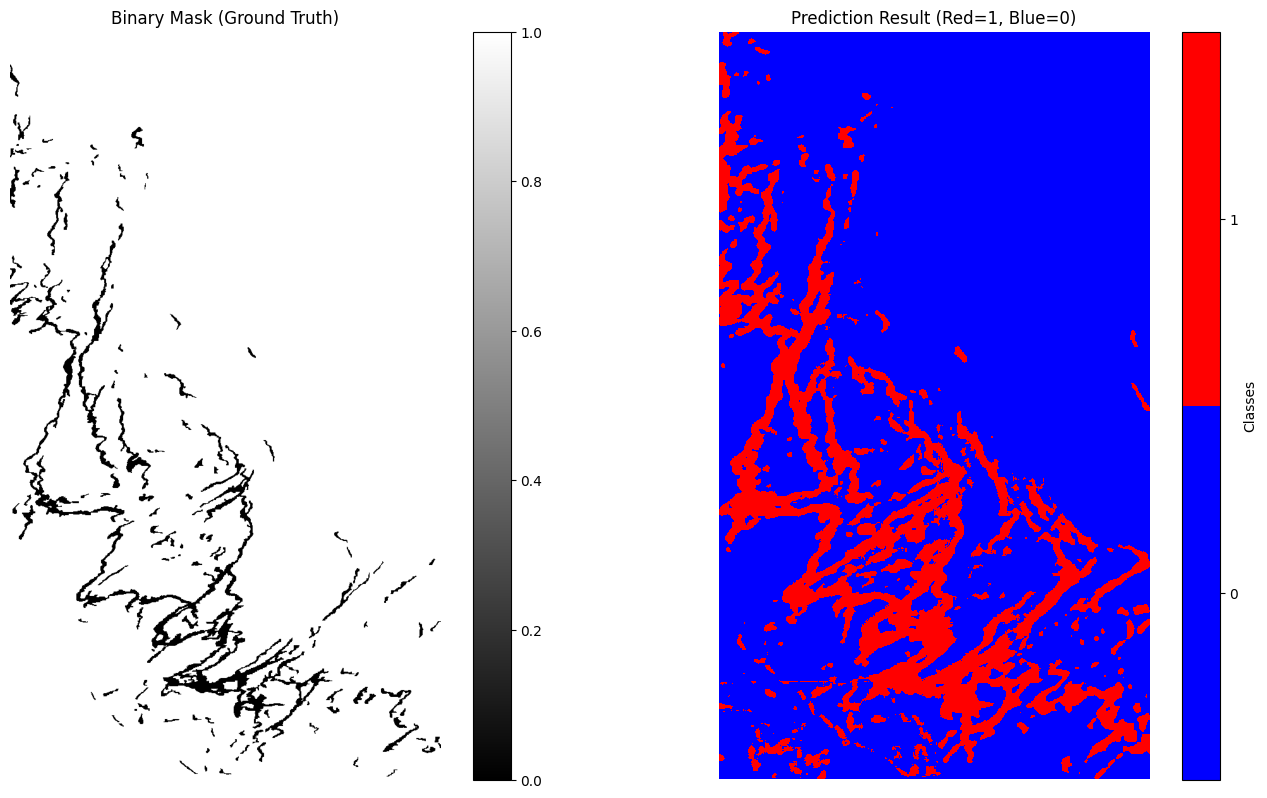

In [5]:
dataset = datasets[10]
gt = dataset.gt
# Define custom color map for prediction
custom_cmap = ListedColormap(['blue', 'red'])

# Create figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# --- First plot: Ground Truth (Binary Mask) ---
im1 = axs[0].imshow(1 - gt, cmap='gray')
axs[0].set_title('Binary Mask (Ground Truth)')
axs[0].axis('off')
fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

# --- Second plot: Predictions ---
im2 = axs[1].imshow(pred_matrix, cmap=custom_cmap, interpolation='nearest')
axs[1].set_title('Prediction Result (Red=1, Blue=0)')
axs[1].axis('off')
fig.colorbar(im2, ax=axs[1], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
im2.set_clim(-0.5, 1.5)

plt.tight_layout()
plt.show()
